In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

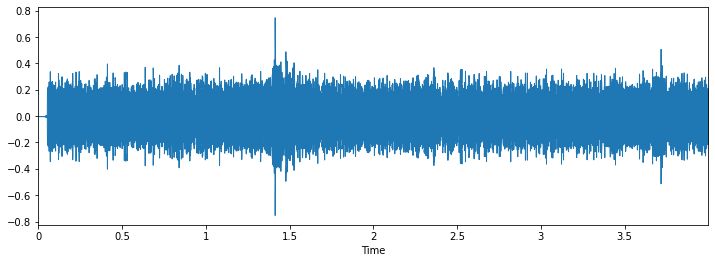

In [2]:
# Class: angin

filename = './dataset_forest/audio/fold5/100852-0-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

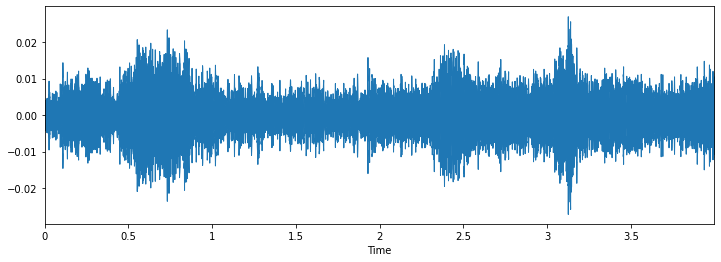

In [3]:
# Class: orang_berbicara

filename = './dataset_forest/audio/fold5/100263-2-0-117.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

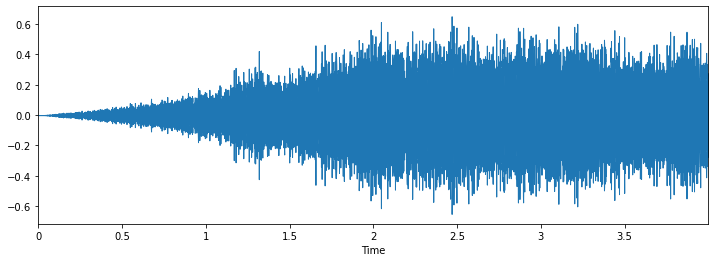

In [4]:
# Class: gergaji

filename = './dataset_forest/audio/fold3/103199-4-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

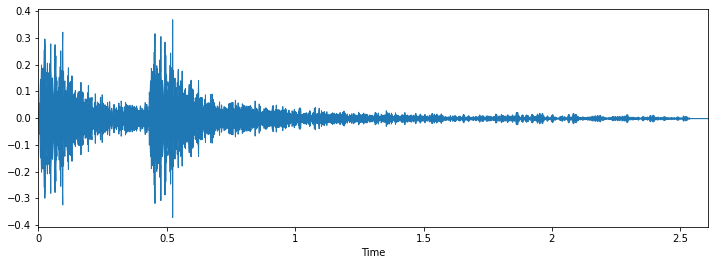

In [5]:
# Class: suara_tembakan

filename = './dataset_forest/audio/fold1/102305-6-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

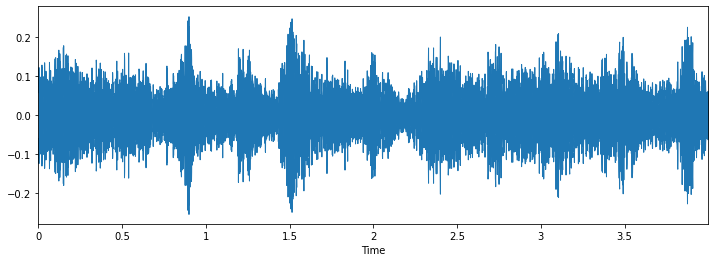

In [6]:
# Class: suara_alam

filename = './dataset_forest/audio/fold7/101848-9-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
import pandas as pd
metadata = pd.read_csv('./dataset_forest/metadata/dataset_forest.csv')
metadata.head()

slice_file_name    fsID  start   end  salience  fold  classID  \
0  100263-2-0-117.wav  100263   58.5  62.5         1     5        2   
1  100263-2-0-121.wav  100263   60.5  64.5         1     5        2   
2  100263-2-0-126.wav  100263   63.0  67.0         1     5        2   
3  100263-2-0-137.wav  100263   68.5  72.5         1     5        2   
4  100263-2-0-143.wav  100263   71.5  75.5         1     5        2   

             class  
0  orang_berbicara  
1  orang_berbicara  
2  orang_berbicara  
3  orang_berbicara  
4  orang_berbicara

In [8]:
print(getattr(metadata,'class').value_counts())

orang_berbicara    1000
angin              1000
suara_alam         1000
gergaji            1000
suara_tembakan      374
Name: class, dtype: int64


In [9]:
import struct

class WavFileHelper():

    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")

        riff = wave_file.read(12)
        fmt = wave_file.read(36)

        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]

        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [10]:
# Load various imports
import pandas as pd
import os
import librosa
import librosa.display

wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():

    file_name = os.path.join(os.path.abspath('./dataset_forest/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [11]:
print(audiodf.num_channels.value_counts(normalize=True))

2    0.931413
1    0.068587
Name: num_channels, dtype: float64


In [12]:
print(audiodf.sample_rate.value_counts(normalize=True))

44100     0.652263
48000     0.259717
96000     0.049611
24000     0.017833
22050     0.007773
192000    0.003887
16000     0.002743
8000      0.002743
11025     0.001829
11024     0.001600
Name: sample_rate, dtype: float64


In [13]:
print(audiodf.bit_depth.value_counts(normalize=True))

16    0.649291
24    0.333791
32    0.010059
8     0.005030
4     0.001829
Name: bit_depth, dtype: float64
